- Diana Zaray Corado #191025
- Pablo Alejandro Méndez #19195
- Orlando Osberto Cabrera #19943
# Hoja de Trabajo 7 - Support Vector Machines
                                                                                                                           

In [99]:
# Librerias
import pandas as pd
import numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [100]:
# Estilos
plt.style.use('ggplot')

In [101]:
# General functions
def calculate_frecuency(data, column, index='index', head = False):
    data_f = pd.DataFrame({
        'frecuency': data[column].value_counts(),
        'relative_frecuency (%)': data[column].value_counts(normalize=True)*100,
        'relative_acc_frecuency': data[column].value_counts(normalize=True).cumsum()
    })
    data_f.reset_index(level=[0], inplace=True)
    data_f.rename(columns={index:column}, inplace=True)
    if head:
        left_aligned_df = data_f.head(20).style.set_properties(**{'text-align': 'center'}) 
    else:
        left_aligned_df = data_f.style.set_properties(**{'text-align': 'center'})
    display(left_aligned_df)
    return data_f

In [102]:
# General variables
cuantitative = [
    'LotFrontage',
    'LotArea',
    'MiscVal',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'GarageArea',
    'GrLivArea',
    'LowQualFinSF',
    '2ndFlrSF',
    '1stFlrSF',
    'TotalBsmtSF',
    'BsmtUnfSF',
    'BsmtFinSF2',
    'BsmtFinSF1',
    'MasVnrArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageCars',
    'SalePrice',
]

# Exploración de los datos
Explore los datos y explique las transformaciones que debe hacerle para generar un modelo 
de máquinas vectoriales de soporte.

In [103]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
train_shape = train.shape
test_shape = test.shape

print(f'Los datos de entrenamiento cuenta con {train_shape[0]} observaciones y {train_shape[1]} variables.\nDe igual forma, los datos de prueba tienen {test_shape[0]} observaciones y {train_shape[1]} variables')

Los datos de entrenamiento cuenta con 1460 observaciones y 81 variables.
De igual forma, los datos de prueba tienen 1459 observaciones y 81 variables


In [104]:
# Resumen de los datos
head = train.head().style.set_properties(**{'text-align': 'center'}) 
display(head)
del head

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000


## Exploración de variables cualitativas
Análisis de frecuencia para observar la distribución de las variables cualitativas

#### ¿Cuál es el estilo de vivienda predominante?
Es estilo de vivienda predominante o el que más se ha vendido según los datos de entrenamiento son aquellas casas de 1 piso estilo 1946 y más pisos con diferentes estilos.

In [105]:
subclas = calculate_frecuency(train, 'MSSubClass')
del subclas

,MSSubClass,frecuency,relative_frecuency (%),relative_acc_frecuency
0,20,536,36.712329,0.367123
1,60,299,20.479452,0.571918
2,50,144,9.863014,0.670548
3,120,87,5.958904,0.730137
4,30,69,4.726027,0.777397
5,160,63,4.315068,0.820548
6,70,60,4.109589,0.861644
7,80,58,3.972603,0.901370
8,90,52,3.561644,0.936986
9,190,30,2.054795,0.957534


#### ¿En qué zona se encuentran las casas más vendidas?
Las zonas en las cuales se encuentran las casas más vendidas son en residenciales con baja densidad. Algo interesante es que no existen casas en zonas industriales o de agricultura.

In [106]:
zoning = calculate_frecuency(train, 'MSZoning')
del zoning

,MSZoning,frecuency,relative_frecuency (%),relative_acc_frecuency
0,RL,1151,78.835616,0.788356
1,RM,218,14.931507,0.937671
2,FV,65,4.452055,0.982192
3,RH,16,1.095890,0.993151
4,C (all),10,0.684932,1.000000


#### ¿Son mayores las ventas si el tipo de vía de acceso a la propiedad es pavimentado?
Sí son mayores las ventas con la vía de acceso pavimentada. De hecho, el 99.5% de las casas vendidas, en los datos de entrenamiento, tienen acceso pavimentado.

In [107]:
street = calculate_frecuency(train, 'Street')
del street

,Street,frecuency,relative_frecuency (%),relative_acc_frecuency
0,Pave,1454,99.589041,0.995890
1,Grvl,6,0.410959,1.000000


#### Predominan las casas con todo tipo de utilidades públicas
El 99.93% de casas cuentan con todo tipo de utilidades públicas, las cuales incluyen, electricidad, gas, agua y tanque séptico.

In [108]:
utilities = calculate_frecuency(train, 'Utilities')
del utilities

,Utilities,frecuency,relative_frecuency (%),relative_acc_frecuency
0,AllPub,1459,99.931507,0.999315
1,NoSeWa,1,0.068493,1.000000


#### ¿La mayor cantidad de casas que se venden se encuentran en excelente estado?
No, las casas que más se venden son las que se encuentran en un estado promedio, aquellas que no están ni excelente pero tampoco mal. Y estás representan un 56% de las ventas totales.

,OverallCond,frecuency,relative_frecuency (%),relative_acc_frecuency
0,5,821,56.232877,0.562329
1,6,252,17.260274,0.734932
2,7,205,14.041096,0.875342
3,8,72,4.931507,0.924658
4,4,57,3.904110,0.963699
5,3,25,1.712329,0.980822
6,9,22,1.506849,0.995890
7,2,5,0.342466,0.999315
8,1,1,0.068493,1.000000


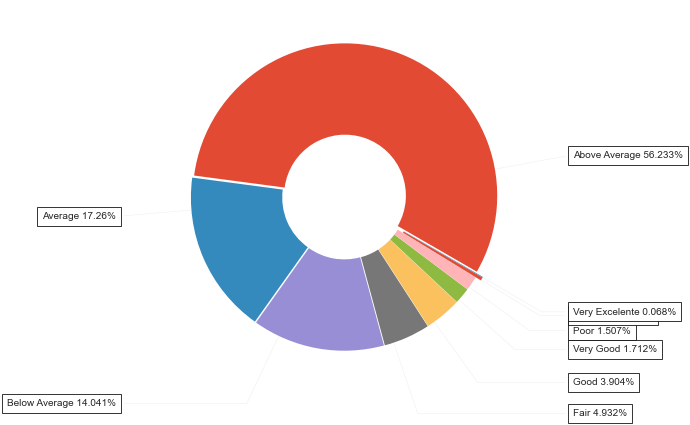

In [109]:
overall = calculate_frecuency(train, 'OverallCond')
# giving the numbers a cualitative meaning
overall['OverallCond'] = overall['OverallCond'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Very Excelente', 'Excelente', 'Very Good', 'Good', 'Above Average', 'Average', 'Below Average', 'Fair', 'Poor', 'Very Poor']) 

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05, 0.05)
wedges, texts = ax.pie(overall['relative_frecuency (%)'], wedgeprops=dict(width=0.6), startangle=-30, explode=explode)

bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.77)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/5. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(overall['OverallCond'][i] + ' ' + str(round(overall['relative_frecuency (%)'][i], 3)) + '%', xy=(x, y), xytext=(1.5*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

#### ¿Las personas prefieren casas fundidas en concreto vertido?
Sí, al menos un 44% de las personas prefieren las casas de cemento vertido, sin embargo, un 43% prefieren las casas de bloques de cemento.

In [110]:
foundation = calculate_frecuency(train, 'Foundation')
del foundation

,Foundation,frecuency,relative_frecuency (%),relative_acc_frecuency
0,PConc,647,44.315068,0.443151
1,CBlock,634,43.424658,0.877397
2,BrkTil,146,10.000000,0.977397
3,Slab,24,1.643836,0.993836
4,Stone,6,0.410959,0.997945
5,Wood,3,0.205479,1.000000


#### Las casas con sótanos de al menos 100 pulgadas de altura son las más vendidas
No, las casa más vendidas son aquellas que tienen sótanos promedio, aproximadamente entre las 80-89 pulgadas.

In [111]:
bsmt = calculate_frecuency(train, 'BsmtQual')
del bsmt

,BsmtQual,frecuency,relative_frecuency (%),relative_acc_frecuency
0,TA,649,45.607871,0.456079
1,Gd,618,43.429375,0.890372
2,Ex,121,8.503162,0.975404
3,Fa,35,2.459592,1.000000


#### La mayoría de viviendas cuentan con un sistema de aire acondicionado central y calefacción en buena calidad
Al menos un 96% de las viviendas cuentan con calefacción en condiciones promedio y un 93.5% cuenta con aire acondicionado central

In [112]:
heating = calculate_frecuency(train, 'HeatingQC')

,HeatingQC,frecuency,relative_frecuency (%),relative_acc_frecuency
0,Ex,741,50.753425,0.507534
1,TA,428,29.315068,0.800685
2,Gd,241,16.506849,0.965753
3,Fa,49,3.356164,0.999315
4,Po,1,0.068493,1.000000


In [113]:
central = calculate_frecuency(train, 'CentralAir')

,CentralAir,frecuency,relative_frecuency (%),relative_acc_frecuency
0,Y,1365,93.493151,0.934932
1,N,95,6.506849,1.000000


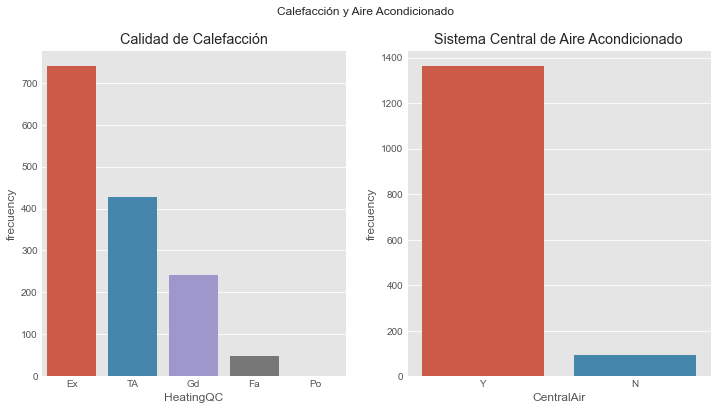

In [114]:
plt.figure(figsize=(12, 6))
# Calefacción
plt.subplot(1, 2, 1)
sns.barplot(x='HeatingQC',y='frecuency',data=heating);
plt.title('Calidad de Calefacción')

# Aire acondicionado
plt.subplot(1, 2, 2)
sns.barplot(x='CentralAir',y='frecuency',data=central);
plt.title('Sistema Central de Aire Acondicionado')

plt.suptitle("Calefacción y Aire Acondicionado")

plt.show()

#### Al menos un 50% de las viviendas cuenta con garage en buenas condiciones
Un 96% de los garages de las viviendas se encuentran en condiciones promedio, y solo apenas un 0.802 tiene garage en buenas condiciones

In [115]:
garage_cond = calculate_frecuency(train, 'GarageCond')

,GarageCond,frecuency,relative_frecuency (%),relative_acc_frecuency
0,TA,1326,96.156635,0.961566
1,Fa,35,2.538071,0.986947
2,Gd,9,0.652647,0.993474
3,Po,7,0.507614,0.998550
4,Ex,2,0.145033,1.000000


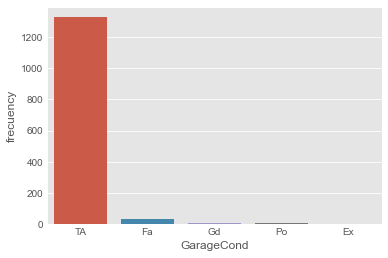

In [116]:
sns.barplot(x='GarageCond', y='frecuency', data=garage_cond)
del garage_cond

#### ¿Cuáles son los precios más altos por los cuales se ha vendido una casa?
De acuerdo con los resultados obtenidos se sabe que el rango de precios en el que están las casas con los precios más altos es de 755000 hasta 485000.

In [117]:
sale_prices  = calculate_frecuency(train, 'SalePrice', head=True)
del sale_prices

,SalePrice,frecuency,relative_frecuency (%),relative_acc_frecuency
0,140000,20,1.369863,0.013699
1,135000,17,1.164384,0.025342
2,155000,14,0.958904,0.034932
3,145000,14,0.958904,0.044521
4,190000,13,0.890411,0.053425
5,110000,13,0.890411,0.062329
6,115000,12,0.821918,0.070548
7,160000,12,0.821918,0.078767
8,130000,11,0.753425,0.086301
9,139000,11,0.753425,0.093836


## Preprocesamiento
Como bien se sabe *Support vector machines* trabaja únicamente con datos numéricos, por lo tal, el primer paso a realizar durante la etapa de preprocesamiento es la creación de un nuevo data set que contenga únicamente las variables cuantitativas. Seguido a esto, se procede a limpiar los datos, es decir, a eliminar observaciones que tengan valores infinitos o valores faltantes, esto para que estas observaciones no afecten al momento de entrena el modelo.

In [118]:
select_train = train[cuantitative]

### Tratamiento de valores NA

In [119]:
# Asegurando que no existan valores nan o inf
select_train = select_train[~select_train.isin([np.nan, np.inf, -np.inf]).any(1)]

## Escalamiento de las variables
Si bien en SVM no es necesario que los datos se encuentren normalizados, algo que sí se debe de realizar es el escalamiento o estandarización de variables, esto para poder evitar que ciertas variables, con rangos numéricos muy grandes "dominen" o sean más influyentes en el modelo que aquellas variables con rangos numéricos pequeños. 

Sin embargo, el escalamiento se realizará luego de tener el conjunto de datos separados en entrenamiento y prueba, ya que al realizarlo antes se puede sesgar el modelo porque la información se puede filtrar o "mezclar" del conjunto de prueba al de entrenamiento. 

Algo interesante de SVM es que no es sensible a los outliers por lo tal no es necesario hacer un tratamiento de los mismos, ya que el SVC trabaja con un *soft margin* que permite cierto grado de *misclassification* para que los valores anormales no afecten al modelo. Si bien, en este caso se tiene un alto *bias* esto se compensa ya que la varianza del modelo es baja, permitiendo así tener predicciones constantes y evitar el *overfitting*

# Datos de entrenamiento y prueba
Use como variable respuesta la variable categórica que especifica si la casa es barata, media 
o cara

### Agregando la variable objetivo al conjunto de datos
Debido a que la variable objetivo es categórica y SVM requiere que que los datos sean representados como un vector de números es necesario codificar las categorías mediante números. Para codificar las categorías se usaran los siguientes valores:
- Baratas: 1
- Intermedias: 10
- Caras: 100

In [120]:
# Agregando la nueva variable al data frame
conditions = [
    (select_train['SalePrice'] <= 171500),
    (select_train['SalePrice'] > 171500) & (select_train['SalePrice'] <= 295500),
    (select_train['SalePrice'] > 295500) 
    ]

values = [1, 10, 100]

select_train['HouseCategory'] = np.select(conditions, values)
del values, conditions

## Selección de variables
Para seleccionar las variables a utilizar dentro del modelo, se inició tomando en consideración únicamente las variables numéricas. Seguido a esto, se realizó una correlación entre todas las variables cuantitativas para poder analizar cuáles son las que influyen significativamente en el precio de venta y con base a esto se seleccionó el conjunto de *features* a utilizar.

In [121]:
important_correlations = []
corr = train[cuantitative].corr(method='spearman')

for start, h1 in enumerate(cuantitative):
    for h2 in cuantitative[start + 1:]:
        if abs(corr[h1][h2]) > 0.5:
            important_correlations.append((h1, h2, corr[h1][h2]))


data = pd.DataFrame(important_correlations, columns=("Variable1", "Variable2", "Correlación"))
data_f = data.style.set_properties(**{'text-align': 'center'}) 
display(data_f)

del start, h1, h2, corr, data, data_f

,Variable1,Variable2,Correlación
0,LotFrontage,LotArea,0.649633
1,GarageArea,GarageCars,0.853317
2,GarageArea,SalePrice,0.649379
3,GrLivArea,2ndFlrSF,0.642857
4,GrLivArea,FullBath,0.658419
5,GrLivArea,TotRmsAbvGrd,0.827874
6,GrLivArea,GarageCars,0.505094
7,GrLivArea,SalePrice,0.731310
8,2ndFlrSF,HalfBath,0.625272
9,2ndFlrSF,TotRmsAbvGrd,0.587189


Como se puede observar en la tabla y gráfica anterior se presentan aquellas variables que cuentan con una alta correlación (tomando como correlación alta a valores mayores o iguales a 0.5). A continuación se listan la correlaciones encontradas por variables:
- LotFrontage → LotArea
- GarageArea → GarageCars, SalePrice
- GrLivArea → 2ndFlrSF, FullBath, TotRmsAbvGrd, GarageCars, SalePrice
- 2ndFlrSF → HalfBath, TotRmsAbvGrd
- 1stFlrSF → TotalBsmtSF, SalePrice
- TotalBsmtSF → SalePrice
- BsmtUnfSF → BsmtFinSF1, BsmtFullBath
- FullBath → TotRmsAbvGrd, GarageCars, SalePrice
- TotRmsAbvGrd → SalePrice
- Fireplaces → SalePrice
- GargeCars → SalePrice

La estrecha correlación con la que cuentan las variables entre sí representa un potencial error para el modelo, ya que como bien se sabe, uno de los supuestos dentro del modelo de regresión logísticas es que las variables no presenten multicolinealidad ya que esto podría sesgar dicho modelo a la información "repetida" presentada por estas variables. Por lo tal, para evitar un sesgo y *overfitting* del modelo se eliminaran las variables correlacionadas, dejando solo una que represente la información de todas dentro del modelo. Las variables que se descartarán del modelo son:
- LotFrontage
- GarageCars
- TotRmsAbvGrd
- FullBath
- HalfBath
- TotalBsmtSF
- BsmtFinSF1
- BsmFullBath
- Fireplaces

In [122]:
useless = ['LotFrontage', 
'GarageCars', 
'TotRmsAbvGrd', 
'FullBath', 
'HalfBath', 
'TotalBsmtSF', 
'BsmtFinSF1', 
'BsmtFullBath', 
'Fireplaces', 
'PoolArea', 
'LowQualFinSF', 
'BsmtFinSF2', 
'BsmtHalfBath', 
'KitchenAbvGr' ]

In [123]:
selected_train = select_train.loc[:, ~select_train.columns.isin(useless)]

In [124]:
# separate between target and predictors
target = selected_train.HouseCategory
predictors = selected_train.loc[:, selected_train.columns != 'HouseCategory']

In [125]:
# stratified sample
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, 
    target, 
    train_size=0.7, 
    shuffle=True,
    random_state=19195
)

# Support Vector Machine (SVM)
Genere varios (más de 2) modelos de SVM con diferentes kernels y distintos valores en los 
parámetros c, gamma y d (en caso de que utilice el polinomial).

# Support Vector Machine (SVM)
Genere varios (más de 2) modelos de SVM con diferentes kernels y distintos valores en los 
parámetros c, gamma y d (en caso de que utilice el polinomial).

In [126]:
# n general, we recommend using StandardScaler within a Pipeline in order to prevent most risks of data leaking
rbf_auto_model = make_pipeline(StandardScaler(), SVC(C=5.0, kernel='rbf', gamma='auto'))
rbf_auto_model.fit(predictors_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5.0, gamma='auto'))])

In [127]:
rbf_scale_model = make_pipeline(StandardScaler(), SVC(C=10.0, kernel='rbf', gamma='scale'))
rbf_scale_model.fit(predictors_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=10.0))])

In [128]:
poly_auto_model = make_pipeline(StandardScaler(), SVC(C=8.0, kernel='poly', gamma='auto', degree=3))
poly_auto_model.fit(predictors_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=8.0, gamma='auto', kernel='poly'))])

In [129]:
poly_scale_model = make_pipeline(StandardScaler(), SVC(C=2.0, kernel='poly', gamma='scale', degree=5))
poly_scale_model.fit(predictors_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=2.0, degree=5, kernel='poly'))])

In [130]:
linear_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))
linear_model.fit(predictors_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

## Predicción de la variable respuesta

In [131]:
# Predicción con el modelo rbf con gama auto y C = 5
prediction_rbf_auto_test = rbf_auto_model.predict(predictors_test)
# Predicción con el modelo rbf con gama scale y C = 10
prediction_rbf_scale_test = rbf_scale_model.predict(predictors_test)
# Predicción con el modelo poly con gama auto, C = 8 y d = 3
prediction_poly_auto_test = poly_auto_model.predict(predictors_test)
# Predicción con el modelo poly con gama scale, C = 2 y d = 5
prediction_poly_scale_test = poly_scale_model.predict(predictors_test)
# Predicción con modelo lineal
prediction_linear_test = linear_model.predict(predictors_test)

# Efectividad del modelo
Generación de las matrices de confusión y explicación de los resultados obtenidos

In [132]:
# Changing style again :)
plt.style.use('seaborn-dark')

In [133]:
target_names = ['Barata', 'Intermedia', 'Cara']

              precision    recall  f1-score   support

      Barata       0.97      0.96      0.96       210
  Intermedia       0.90      0.90      0.90       124
        Cara       0.78      0.84      0.81        25

    accuracy                           0.93       359
   macro avg       0.88      0.90      0.89       359
weighted avg       0.93      0.93      0.93       359



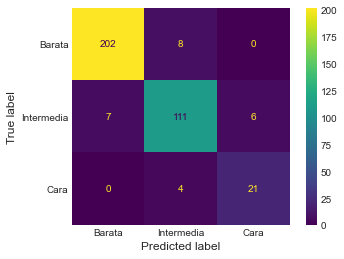

In [134]:
print(classification_report(target_test, prediction_rbf_auto_test, target_names=target_names))
cm = confusion_matrix(target_test, prediction_rbf_auto_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

En el reporte de clasificación anterior se puede observar que el modelo cuenta con una exactitud del 93%, lo cual indica que es bastante exacto al momento de predecir un nuevo dato que ingrese al modelo. Sin embargo, si se desgloza más a detalle esta información se puede observar que la precisión para predecir casas caras es la más baja de todas las categorías, con un valor de 78%, a diferencia de la mejor precisión, que es al momento de predecir casas baratas con un valor de 97%. Agregado a esto, también se puede observar que el modelo es más "sensible" al momento de predecir casas caras que al predecir casas baratas, esto se puede observar en en el valor de *recall*obtenido.

Si bien la exactitud o *accuracy* del modelo es muy cercana al ideal, el cual es 1, cabe tomar en cuenta que esta métrica no siempre es un buen indicador de qué tan bien es el modelo, por lo tal, para tomar en cuenta la precisión y sensibilidad del modelo una mejor métrica que puede indicar qué tan bien es el modelo es el *f1-score* para el modelo creado con kernel rbf, con un valor de regularización de 5 y un valor gamma "auto", en promedio el modelo es 83% bueno prediciendo nuevos valores según valor de *f1-score*

Por otro lado, en la matriz de confusión se puede observar que en el tipo de casas que menos se confudió es en las casas caras, esto podría parecer que no concuerda con la información devuelta por el reporte de clasificación, sin embargo, lo que sucede es que en porcentaje, debido a la cantida de datos que existían para clasificar, fue en esta categoría que el modelo se equivocó más, clasificando erróneamente aproximadamente un 16% de las casas caras. Por otro lado, se puede notar que en cantidad neta de errores cometidos, la categoría en la cual más se equivocó el modelo fue al clasificar casas intermedias.

              precision    recall  f1-score   support

      Barata       0.97      0.95      0.96       210
  Intermedia       0.89      0.91      0.90       124
        Cara       0.81      0.88      0.85        25

    accuracy                           0.93       359
   macro avg       0.89      0.91      0.90       359
weighted avg       0.93      0.93      0.93       359



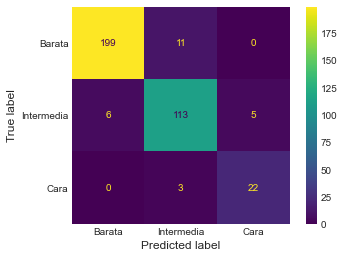

In [135]:
print(classification_report(target_test, prediction_rbf_scale_test, target_names=target_names))
cm = confusion_matrix(target_test, prediction_rbf_scale_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

Al igual que el modelo anterior, en el reporte de clasificación de este modelo se puede observar que la exactitud para predecir nuevos valores por el modelo es de 93%. Por otro lado en la matriz de confusión se puede observar que aproximadamente un 5% de las casas que eran caras fueron clasificadas como intermedias, es decir el modelo tuvo un 5% de falsos negativos en la predicción de casas caras, esto se puede observar con el valor de *recall* obtenido, el cual es de 96%. Con este mismo análisis, se observa que en el caso de las casas intermedias, al predecirlas se obtuvo un 10% de falsos negativos, los cuales se reparten entre casas intermedias clasificadas como baratas o como caras. Y finalmente, al momento de clasificar casas caras, un 12% de las clasificaciones realizadas fueron falsos negativos. 

Como se puede notar en el párrafo anterior el porcentje de falsos negativos al momento de hacer la clasificación de casas caras es el más alto, esto también se puede ver reflejado, en que, de las 3 categorías, el valor de *recall* de las casas caras es el más bajo, con un valor de 85%. Es fácil notar que si bien, de manera "neta" las casas de tipo cara son las que menos se equivocó el modelo en predecir, debido a que son pocos datos, esto implica que su porcentaje equivalente de errores es más alto en relación a las categorías intermedias y baratas que tienen una cantidad de datos significativamente mayor.  

              precision    recall  f1-score   support

      Barata       0.95      0.93      0.94       210
  Intermedia       0.87      0.89      0.88       124
        Cara       0.85      0.92      0.88        25

    accuracy                           0.91       359
   macro avg       0.89      0.91      0.90       359
weighted avg       0.91      0.91      0.91       359



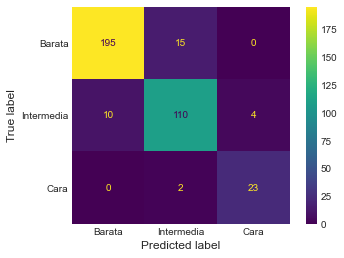

In [136]:
print(classification_report(target_test, prediction_poly_auto_test, target_names=target_names))
cm = confusion_matrix(target_test, prediction_poly_auto_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

El modelo polinomial con un grado de 3 y una regularización de 8, es al momento y con respecto al valor de *accuracy* el peor modelo, ya que tiene un valor de exactitud de 91%. En general, este valor de exactitud es bastante bueno ya que indica que en un 91% el modelo predice con exactitud los valores, sin embargo, al compararlo con los modelos anteriormente desarrollados, este es el que presenta la exactitud más baja. Por otro lado, analizando un poco más a detalle la matriz de confusión se puede observar que un 5% de las clasificaciones de casas baratas es un falso positivo, ya que el modelo las predijo como intermedias, pero realmente eran caras. 

Por otro lado, siguiendo el mismo análisis se puede notar que en el caso de las casas intermedias aproximadamente un 16% son falsos positivos, y de esto un 2% las clasificó erróneamente como casas caras y un 14% como casas baratas. Finalmente, al analizar las predicciones en el caso de las casas caras, se puede notar que de las 27 predicciones realizadas como caras un 15% de estas son falsos negativos, ya que en realidad eran casas de tipo intermedio. 

Si bien el modelo, en cada una de las predicciones realizadas presenta falsos positivos, el porcentaje de estos datos clasificados erróneamente no es tan significativo con respecto a los valores clasificados correctamente. Esto se puede notar en los valores de precisión obtenidos para cada una de las categorías,ya que ningún valor se encuentra por debajo del 80%, lo que indica que el modelo es bastante preciso al momento de clasificar las categorías de los datos. 

              precision    recall  f1-score   support

      Barata       0.71      0.97      0.82       210
  Intermedia       0.72      0.27      0.39       124
        Cara       0.73      0.76      0.75        25

    accuracy                           0.71       359
   macro avg       0.72      0.66      0.65       359
weighted avg       0.71      0.71      0.66       359



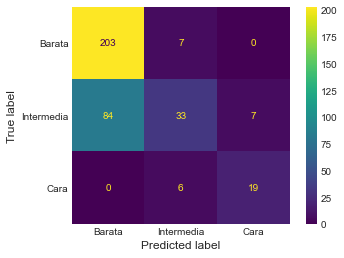

In [137]:
print(classification_report(target_test, prediction_poly_scale_test, target_names=target_names))
cm = confusion_matrix(target_test, prediction_poly_scale_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

En el caso del modelo creado con kernel polinomial, una regularización de 2 y un grado de 5, se obtiene una exactitud de 71%, como es fácil de notar esta no es una exactitud tan buena como la obtenida anteriormente por otros modelos, ya que anteriormente el valor de exactitud se había establecido por arriba del 90%. Esta disminución de la exactitud también se puede observar en la precisión y la sensibilidad del modelo, ya que, todos los valores de precisión están en un rango de 71% a 73% y algo interesante a observar en la sensibilidad del modelo es que al momento de clasificar casas intermedias, únicamente es capaz de clasificar un 27% correctamente, dejado así un 73% de los datos clasificados como falsos negativos. 

Por otro lado, observando la matriz de confusión, se puede notar que en cuanto a la clasificación de casas baratas es el modelo que menor error cometió, ya que de las 210 casas clasificadas como baratas, únicamente clasificó incorrectamente 7, en otras palabras; al momento de clasificar casas caras cuenta con aproximadamente un 3% de falsos negativos, dejando así un valor de *recall* de 97%. Al tomar en consideración tanto la precisión como la "sensibilidad" la exactitud promedio del modelo es de 65%, siendo este un valor bastante bajo, que indica que el modelo no es tan exacto o preciso al momento de predecir nuevos datos.

              precision    recall  f1-score   support

      Barata       0.99      0.96      0.97       210
  Intermedia       0.93      0.94      0.94       124
        Cara       0.83      1.00      0.91        25

    accuracy                           0.96       359
   macro avg       0.92      0.97      0.94       359
weighted avg       0.96      0.96      0.96       359



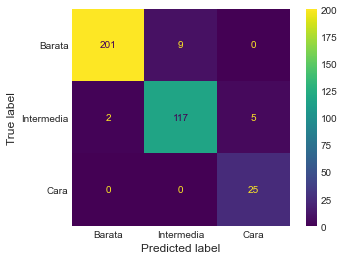

In [138]:
print(classification_report(target_test, prediction_linear_test, target_names=target_names))
cm = confusion_matrix(target_test, prediction_linear_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

Por último, se realizó un modelo con un kernel lineal y como se puede observar en el reporte de clasificación que con un valor de *accuracy* de 96%, el modelo es bastante exacto al momento de predecir nuevos valores, lo cual se ve reflejado en en la matriz de confusión, ya que se puede observar que para las casas caras únicamente clasificó 9 como falsos negativos, en el caso de las casas intermedias solo existen se clasificaron 7 datos como falsos negativos, y algo interesante que ningún modelo anteriormente había realizado es clasificar correctamente todas las casas caras. 

La correcta clasificación de todas las casas caras se puede ver en el valor de *recall* obtenido, ya que es un valor de 100%, sin embargo, también se puede observar que en cuanto al valor de precisión, de las 3 categorías que se tienen, las casas caras es la menor, esto debido a los falsos positivos clasificados de las casas que eran intermedias pero se clasificaron como caras 

# Comparación entre los modelos de SVM
Compare los resultados obtenidos con los diferentes modelos que hizo en cuanto a efectividad, tiempo de procesamiento y equivocaciones (donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores).

De todos los modelos anteriormente realizados, si se comparan entre ellos por medio de la efectividad al momento de hacer las predicciones se puede decir que el mejor modelo fue el que se realizó con kernel lineal ya que cuenta con una exactitud promedio de un 94%. Sin embargo, es importante considerar que decir que un modelo es el mejor, es algo bastante subjetivo, ya que depende del problema que se esté buscando resolver y qué es lo que se está buscando optimizar, en cuanto a métrica se refiere. Por otro lado, si vemos a los tiempos de ejecución que tardó cada uno de los modelos, se tiene que aquellos desarrollados con kernel *rbf* son los que se tardaron más, llegando a tiempos de 380ms a diferencia del que tardó menos tiempo de ejecución, el cual fue el del kernel lineal, con un tiempo de 13ms. Para este caso particular, con el modelo de kernel lineal se puede decir que se tiene "lo mejor de los dos mundos" ya que es el mejor modelo en cuanto a *f1-score* promedio y también fue el modelo más rápido.

Algo interesante es que todos los modelos al momento de predecir casas intermedias, los errores existían ya sea que el modelo clasificara la casa como barata o cara, esto podría indicar que el *treshold* establecido por el modelo no estaba establecido de manera óptima permitiendo una mayor cantidad de clasificaciones erróneas. Cabe resaltar que el valor permitido de clasificaciones erróneas se establece mediante el parámetro de regularización, o valor C, sin embargo, si se establecen valores de C muy bajos, el modelo tendrá poco *bias* es decir, el modelo encontrará un plano que se ajuste a los datos de training, sin embargo, esto ocasiona *overfitting* ya que el modelo tendra una alta varianza al momento de predecir nuevos valores, porque se ajustó tan bién a los datos de entrenamiento que ahora no sabe qué hacer con nuevos datos que ingresan a dicho modelo. Esto se puede observar en el modelo con kernel polinomial y cuyo valor de regularización era de 2, este modelo, al momento de predecir fue, de los 5 creados, el peor en cuanto a valores de *accuracy* y *f1-score*. Algo a tomar bastante en consideración en este caso, es que con una regularización baja y un kernel polinomial la categoría en la cual mayor cantidad de errores se tienen es en las casas intermedias, esto se puede ocasionar debido a que las casas intermedias se encuentran en un rango de valores. Es decir, para clasificar las casas intermedias deben de existir 2 barreras, una que delimite en cuanto a las casas baratas y la otra que delimite en cuanto a las casas caras, por lo tal al existir un bajo *bias* del modelo este puede establecer "barreras" muy justas a los datos de entrenamiento, dando así paso a una mayor varianza al momento de hacer las predicciones de nuevos datos que ingresan al modelo.

Por otro lado, algo que se realizó pero no se dejó evidencia dentro de la hoja de trabajo, fue comprobar el efecto que tiene el escalar las variables al momento de entrenar y predecir los datos, y lo que se observó es que en el caso de los modelos con kernel RBF al no escalar las variables únicamente era capaz de predecir correctamente las casas de categoría barata, y de hecho, lo que hacía el modelo, es que TODAS las observaciones las clasificaba como baratas. Por otro lado, también se hizo esta prueba, solo que utilizando un kernel lineal, y al no escalar las variables el modelo era capaz de predecir en un 99% correctamente todas las categorías de los datos. Por lo tal, para determinar si escalar o no es una buena estrategia para el conjunto de datos es importante tomar en consideración el kernel que se está utilizando. 

# Comparación con la efectividad de los algoritmos de las hojas de trabajo anteriores
Compare la eficiencia del mejor modelo de SVM con los resultados obtenidos en los algoritmos de las hojas de trabajo anteriores que usen la misma variable respuesta (árbol de decisión y random forest, naive bayes). ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar?

Como ya se ha mencionado anteriormente, el mejor modelo, hasta ahora, es el elaborado mediante áboles de decisión, ya que este es capaz de predecir correctamente TODAS las categorías de las casas en el conjunto de datos, sin embargo, también es, a su vez es el más lento, ya que valga la redundancia debe de diseñar el árbol por el cual irá moviendo los datos y así decidir la clasificación de la observación. Por otro lado, se tiene que los modelos más rápidos desarrollados son aquellos mediante Bayes, sin embargo, la efectividad de estos modelos no era para nada cerca de lo bueno de los árboles de decisión. Una alternativa que presenta tanto rápidez y efectividad para predecir, es el modelo desarrollado mediante *support vector machines*, si bien no es tan bueno como los árboles de decisión, es mucho más rápido que estos, lo cual, con conjuntos de datos demasiado grandes permite agregar un ventaja significativa. 

Por otro lado, como se pudo observar en esta hoja, mediante distintas combinaciones de los parámetros es posible desarrollar un mejor o pero modelo, por lo tal una recomendación para encontrar los parámetros óptimos o aquellos que lograrán crear el mejor modelo para lograr una mejor predicción de los datos es mediante el uso de *cross validation* ya que mediante esto se puede evaluar con distintos valores en los parámetros del algoritmos de *support vector machine* y así comparar entre ellos aquel que logre predecir y adaptarse de mejor forma a los datos, es decir lograr encontrar un balance entre el sesgo y la varianza del modelo.